In [2]:
! rm -r *
! git clone https://github.com/prabhunithingollapudi007/HandSignClassification

Cloning into 'HandSignClassification'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1065 (delta 1), reused 28 (delta 1), pack-reused 1036
Receiving objects: 100% (1065/1065), 444.86 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Checking out files: 100% (959/959), done.


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [2]:
CLASSES = 10
TRAIN_SAMPLES_EACH_CLASS = 10
TEST_SAMPLES_EACH_CLASS = 5

In [0]:
zeros_train = glob('HandSignClassification/train/Zero/*.txt')
ones_train = glob('HandSignClassification/train/One/*.txt')
twos_train = glob('HandSignClassification/train/Two/*.txt')

threes_train = glob('HandSignClassification/train/Three/*.txt')
fours_train = glob('HandSignClassification/train/Four/*.txt')
fives_train = glob('HandSignClassification/train/Five/*.txt')

sixes_train = glob('HandSignClassification/train/Six/*.txt')
sevens_train = glob('HandSignClassification/train/Seven/*.txt')
eights_train = glob('HandSignClassification/train/Eight/*.txt')
nines_train = glob('HandSignClassification/train/Nine/*.txt')

In [0]:
zeros_test = glob('HandSignClassification/test/Zero/*.txt')
ones_test = glob('HandSignClassification/test/One/*.txt')
twos_test = glob('HandSignClassification/test/Two/*.txt')

threes_test = glob('HandSignClassification/test/Three/*.txt')
fours_test = glob('HandSignClassification/test/Four/*.txt')
fives_test = glob('HandSignClassification/test/Five/*.txt')

sixes_test = glob('HandSignClassification/test/Six/*.txt')
sevens_test = glob('HandSignClassification/test/Seven/*.txt')
eights_test = glob('HandSignClassification/test/Eight/*.txt')
nines_test = glob('HandSignClassification/test/Nine/*.txt')

In [4]:
def get_appended_data_arrays(files):
  temp_array = []
  for file in files:
    temp_array.append(get_data_array(file))
  return np.array(temp_array)

In [5]:
def get_data_array(file_path):
  with open(file_path) as src_file:
    data_array = np.empty((303360, 4))
    for index, line in enumerate(src_file.readlines()):
      data_array[index] = [int(x) for x in line.split()]    
    data_array = np.reshape(data_array, (480, 632, 4))
    data_array = data_array.astype(np.uint8)
    return data_array

In [0]:
def my_one_hot_encoder_generator(nclasses, nthclass):
  temp = [0] * nclasses
  temp[nthclass] = 1
  return np.array(temp)

In [0]:
complete_output_array_test = []
complete_output_array_train = []

for nthclass in range(CLASSES):
  temp_array = []
  for sample in range(TRAIN_SAMPLES_EACH_CLASS):
    temp_array.append(my_one_hot_encoder_generator(CLASSES, nthclass))
  complete_output_array_train.append(np.array(temp_array))


for nthclass in range(CLASSES):
  temp_array = []
  for sample in range(TEST_SAMPLES_EACH_CLASS):
    temp_array.append(my_one_hot_encoder_generator(CLASSES, nthclass))
  complete_output_array_test.append(np.array(temp_array))

In [6]:
complete_input_array_train = []
complete_input_array_test = []
train_files = [zeros_train, ones_train, twos_train, threes_train, fours_train, fives_train, sixes_train, sevens_train, eights_train, nines_train]
test_files = [zeros_test, ones_test, twos_test, threes_test, fours_test, fives_test, sixes_test, sevens_test, eights_test, nines_test]
for files in train_files:
  complete_input_array_train.append(get_appended_data_arrays(files))
for files in test_files:
  complete_input_array_test.append(get_appended_data_arrays(files))


In [7]:
zeros = [complete_input_array_train[0][y] for y in [int(x[-5]) for x in np.random.choice(zeros_train, 1)]][0]

ones = [complete_input_array_train[1][y] for y in [int(x[-5]) for x in np.random.choice(ones_train, 1)]][0]
twos = [complete_input_array_train[2][y] for y in [int(x[-5]) for x in np.random.choice(twos_train, 1)]][0]
threes = [complete_input_array_train[3][y] for y in [int(x[-5]) for x in np.random.choice(threes_train, 1)]][0]

fours = [complete_input_array_train[4][y] for y in [int(x[-5]) for x in np.random.choice(fours_train, 1)]][0]
fives = [complete_input_array_train[5][y] for y in [int(x[-5]) for x in np.random.choice(fives_train, 1)]][0]
sixes = [complete_input_array_train[6][y] for y in [int(x[-5]) for x in np.random.choice(sixes_train, 1)]][0]

sevens = [complete_input_array_train[7][y] for y in [int(x[-5]) for x in np.random.choice(sevens_train, 1)]][0]
eights = [complete_input_array_train[8][y] for y in [int(x[-5]) for x in np.random.choice(eights_train, 1)]][0]
nines = [complete_input_array_train[9][y] for y in [int(x[-5]) for x in np.random.choice(nines_train, 1)]][0]

data = [zeros, ones, twos, threes, fours, fives, sixes, sevens, eights, nines]
labels = ['Zero'] + ['One'] + ['Two'] + ['Three'] + ['Four'] + ['Five'] + ['Six'] + ['Seven'] + ['Eight'] + ['Nine']



N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    plt.imshow(src)
    plt.axis('off')




N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    plt.imshow(src[:, :, :3])
    plt.axis('off')



N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    fg = Image.fromarray(src[:, :, 3])
    plt.imshow(fg, cmap='gray')
    plt.axis('off')

ValueError: 'a' cannot be empty unless no samples are taken

In [0]:
complete_input_array_train = np.array(complete_input_array_train)
complete_input_array_test = np.array(complete_input_array_test)

complete_output_array_train = np.array(complete_output_array_train)
complete_output_array_test = np.array(complete_output_array_test)

In [0]:
complete_input_array_train = complete_input_array_train.reshape(100,480,632,4)
complete_input_array_test = complete_input_array_test.reshape(50,480,632,4)

In [0]:
complete_output_array_train = complete_output_array_train.reshape(100, 10)
complete_output_array_test = complete_output_array_test.reshape(50, 10)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480,632,4)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 478, 630, 64)      2368      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 239, 315, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 239, 315, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 237, 313, 32)      18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2373792)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                23737930  
Total params: 23,758,762
Trainable params: 23,758,762
Non-trainable params: 0
__________________________________________

In [36]:
history = model.fit(complete_input_array_train, complete_output_array_train, validation_data=(complete_input_array_test, complete_output_array_test), epochs=10)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 71s 707ms/step - loss: 12156.3471 - accuracy: 0.1000 - val_loss: 11426.0046 - val_accuracy: 0.1000
Epoch 2/10
100/100 [==============================] - 68s 676ms/step - loss: 10249.2745 - accuracy: 0.0900 - val_loss: 23.7090 - val_accuracy: 0.1000
Epoch 3/10
100/100 [==============================] - 67s 670ms/step - loss: 319.1051 - accuracy: 0.1300 - val_loss: 1.8553 - val_accuracy: 0.7600
Epoch 4/10
100/100 [==============================] - 69s 688ms/step - loss: 92.2388 - accuracy: 0.1200 - val_loss: 1.5818 - val_accuracy: 0.7800
Epoch 5/10
100/100 [==============================] - 67s 672ms/step - loss: 10.5783 - accuracy: 0.3400 - val_loss: 2.0795 - val_accuracy: 0.6200
Epoch 6/10
100/100 [==============================] - 66s 662ms/step - loss: 1.5997 - accuracy: 0.5700 - val_loss: 2.0443 - val_accuracy: 0.6800
Epoch 7/10
100/100 [==============================] - 68s 679ms/step

In [0]:
def plot_training(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'r')
  plt.plot(epochs,val_acc,'g')
  plt.title('Training and Validation accuracy')
  plt.legend(['training accuracy', 'validation accuracy'])

  plt.figure()
  plt.plot(epochs,loss,'r')
  plt.plot(epochs,val_loss,'g')
  plt.legend()
  plt.title('Training and Validation loss')
  plt.legend(['training loss', 'validation loss'])

  plt.show()


No handles with labels found to put in legend.


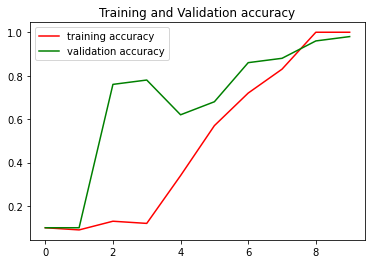

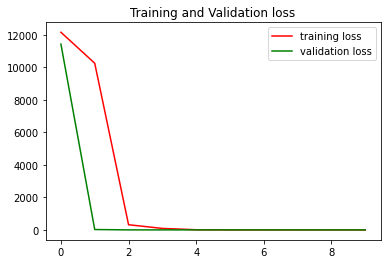

In [53]:
plot_training(history)

In [0]:
MODEL_FILE = 'classifier.model'
model.save(MODEL_FILE)

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
predictions = model.predict(complete_input_array_train)
print(len(predictions))

100


In [0]:
def get_true_values(classes, samples):
  my_true_values = []
  for i in range(classes):
    for j in range(samples):
      my_true_values.append(i)
  return my_true_values

In [60]:
np.argmax(predictions[9])

0

In [0]:
def convert_predictions(preds):
  temp_array = []
  for i in range(len(preds)):
    temp_array.append(np.argmax(preds[i]))
  return temp_array

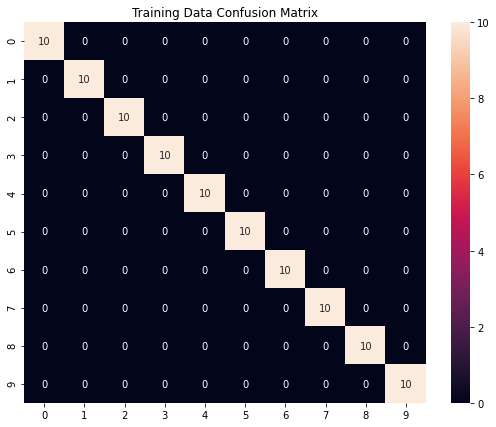

In [68]:
cm = confusion_matrix(get_true_values(10, 10), convert_predictions(predictions))
plt.figure(figsize=(9, 7))
plt.title("Training Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

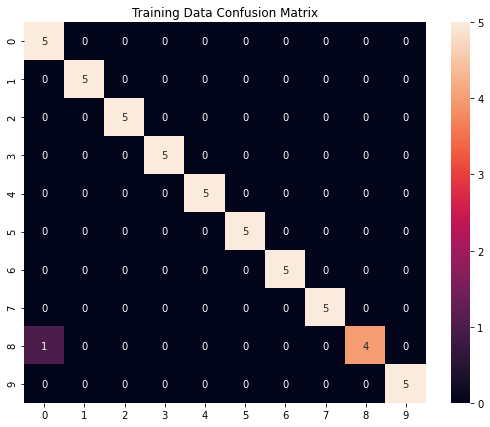

In [69]:
cm = confusion_matrix(get_true_values(10, 5), convert_predictions(model.predict(complete_input_array_test)))
plt.figure(figsize=(9, 7))
plt.title("Testing Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(480,632,4)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [1]:
model.fit(complete_input_array_train, complete_output_array_train, validation_data=(complete_input_array_test, complete_output_array_test), epochs=5)

NameError: ignored

In [33]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
import tensorflow as tf
CLASSES = 10
    
# setup model
new_input = Input(shape=(640, 480, 2))

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=new_input)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])      
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

ValueError: ignored

In [29]:
model.fit(complete_input_array_train, complete_output_array_train, validation_data=(complete_input_array_test, complete_output_array_test), epochs=5)

ValueError: ignored